# Exploratory Analysis of the fMRI data

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [16]:
plt.rcParams['font.size'] = 16.0

In [4]:
# Load the data
data_file = '/global/cfs/cdirs/m1759/sfarrell/nesap-stl/data/brain_mnist.npy'
data = np.load(data_file)

In [5]:
data.shape

(16, 90, 90, 10, 380)

## Voxel spectrum

In [6]:
data.min(), data.max(), data.mean()

(0.0, 70248.93, 1283.6613)

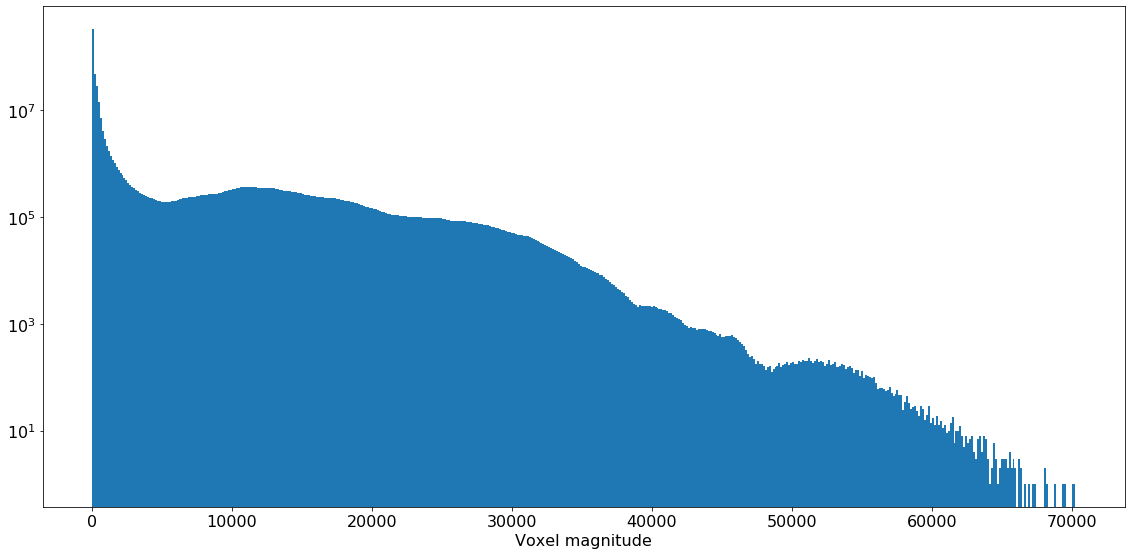

In [40]:
plt.figure(figsize=(16,8))
plt.hist(data.flatten(), bins=500, log=True)
plt.xlabel('Voxel magnitude')
plt.tight_layout()

In [22]:
print('Fraction of voxels with nonzero values:', (data[0] > 1e-7).mean())

Fraction of voxels with nonzero values: 0.831287134502924


## 2D slices

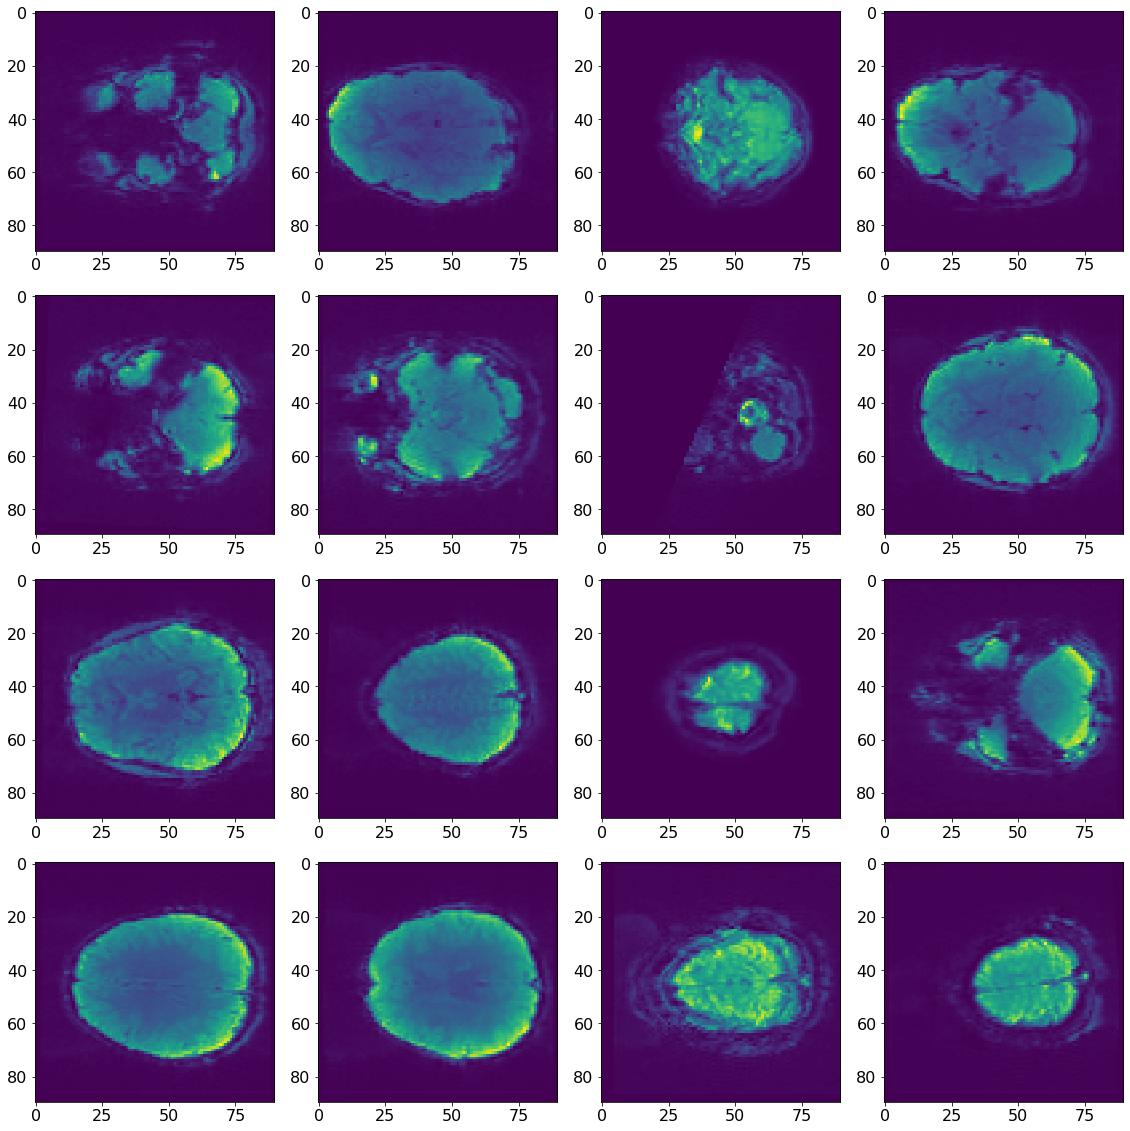

In [58]:
# Uniformly sample x-y slices
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    z = np.random.randint(data.shape[3])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, :, z, t])
    
plt.tight_layout()

It's difficult to see features in the X-Z and Y-Z slices, so I'm suppressing these ones until we have the full samples.

In [ ]:
# Uniformly sample x-z slices
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    y = np.random.randint(data.shape[2])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, y, :, t], aspect='auto')

plt.tight_layout()

In [ ]:
# Uniformly sample y-z slices
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    x = np.random.randint(data.shape[1])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, x, :, :, t], aspect='auto')

plt.tight_layout()

## 2D projections, time sliced

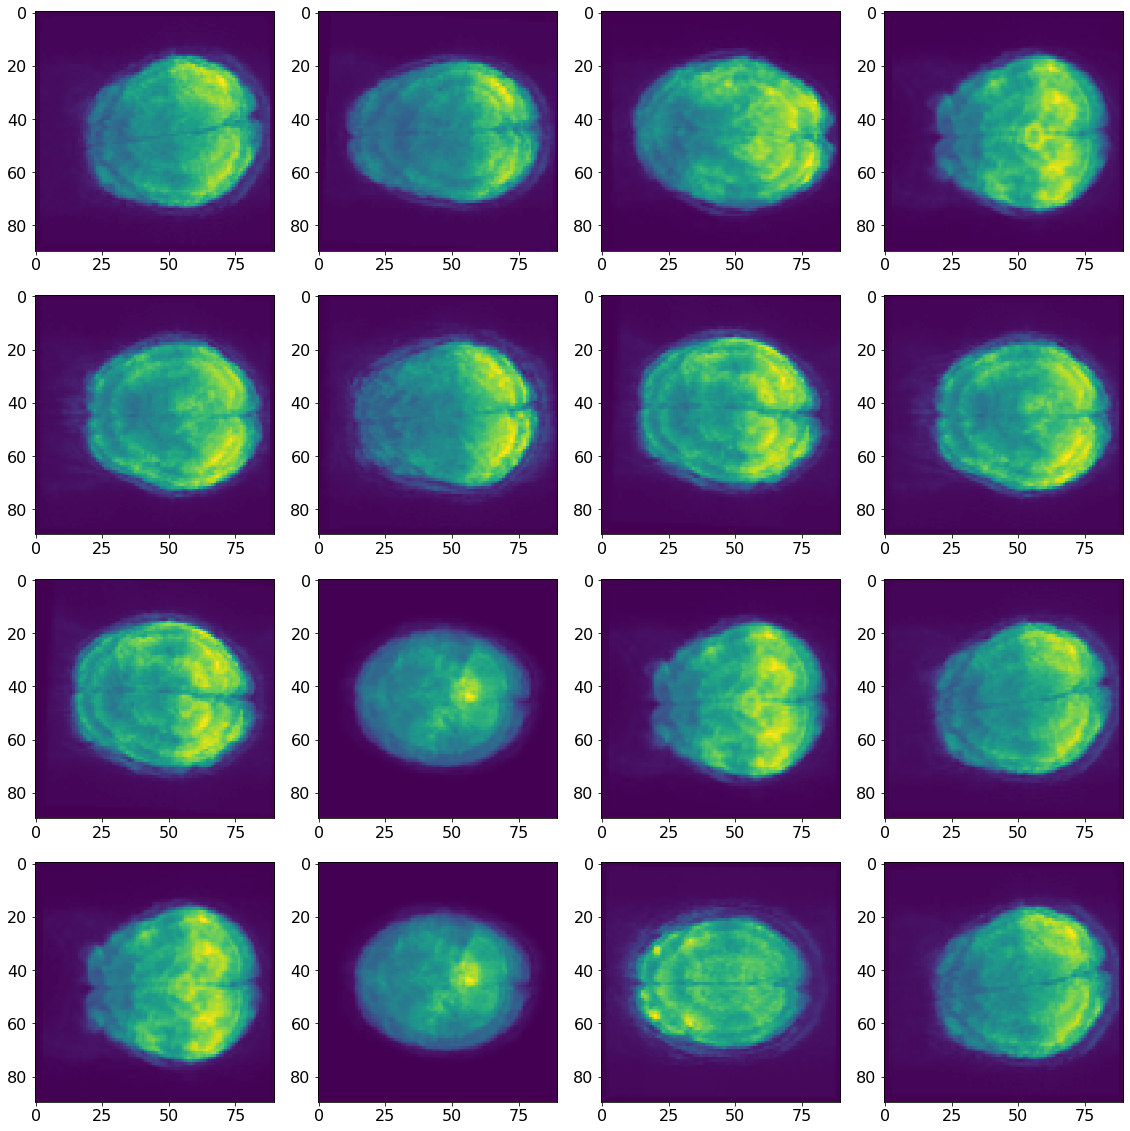

In [72]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, :, :, t].sum(axis=2))
    
plt.tight_layout()

## 2D projections, time-projected

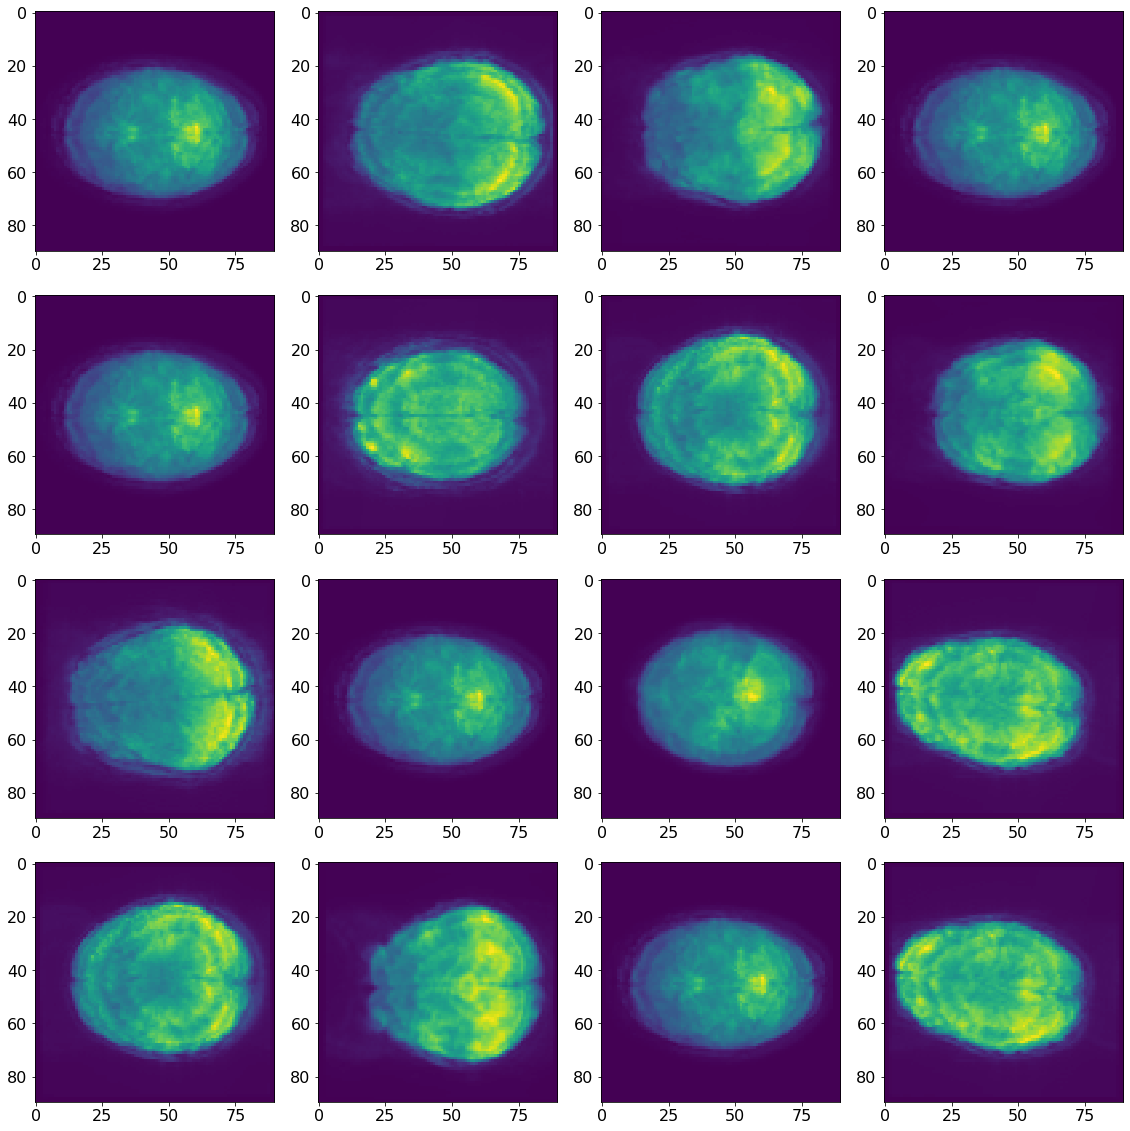

In [81]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    ax.imshow(data[i].sum(axis=(2,3)))
    
plt.tight_layout()

## 2D projections, time unrolled

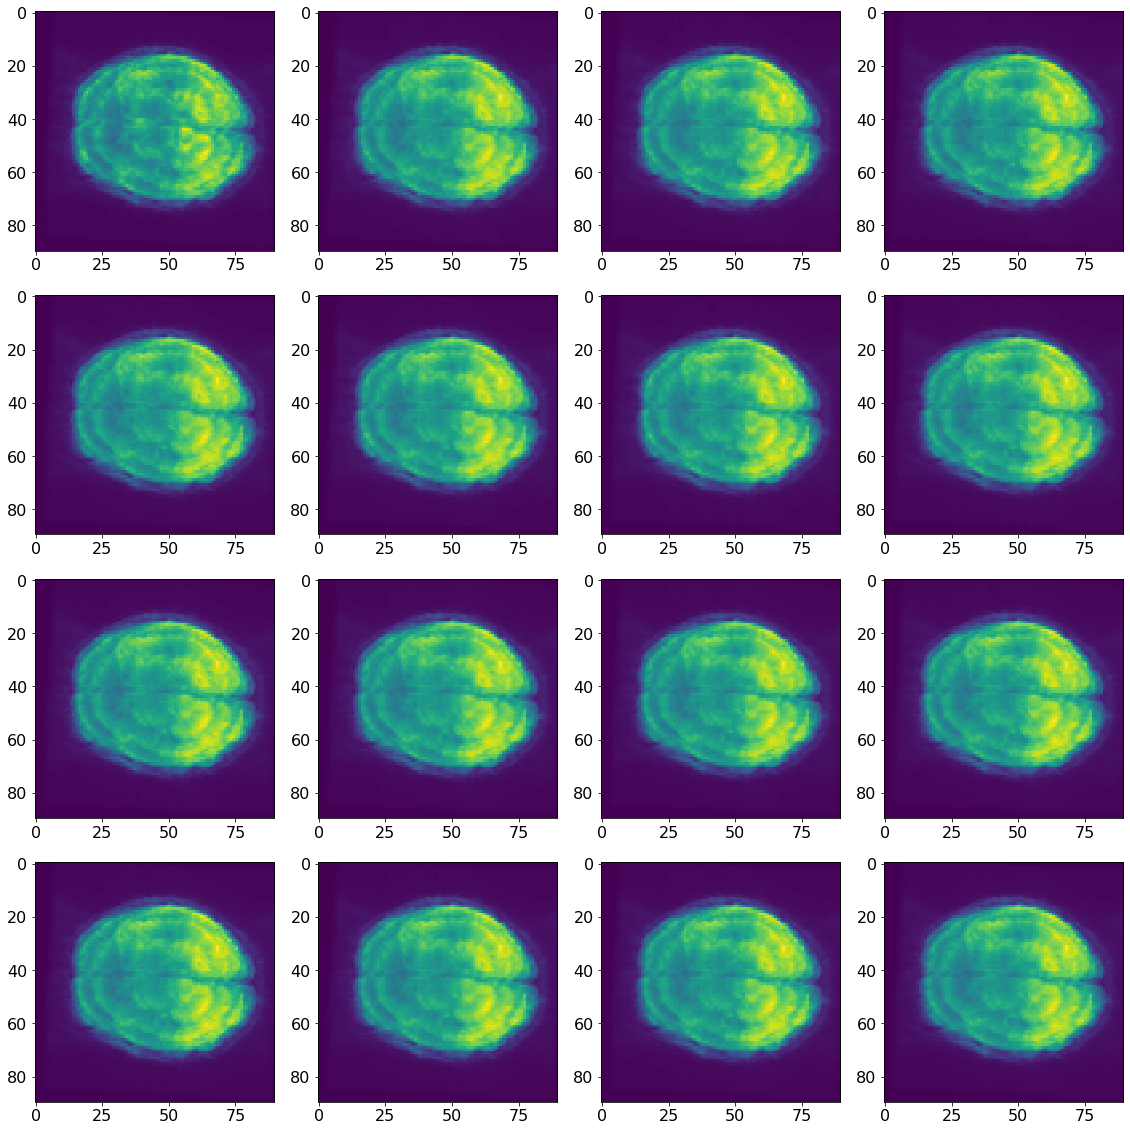

In [119]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
i = np.random.randint(data.shape[0])
#z = 4

for t, ax in enumerate(axs.flatten()):
    # Taking 16-frame timesteps to try and see long term variations
    ax.imshow(data[i, :, :, :, t*16].sum(axis=2))

    # Z slice instead of projection
    #ax.imshow(data[i, :, :, z, t*16])
    
plt.tight_layout()

We can't see much variation in time here, even when I take large timesteps.

I wonder if the changes are just hidden because of the massive tails of the spectrum... Maybe I can see time variations in the log of the data.

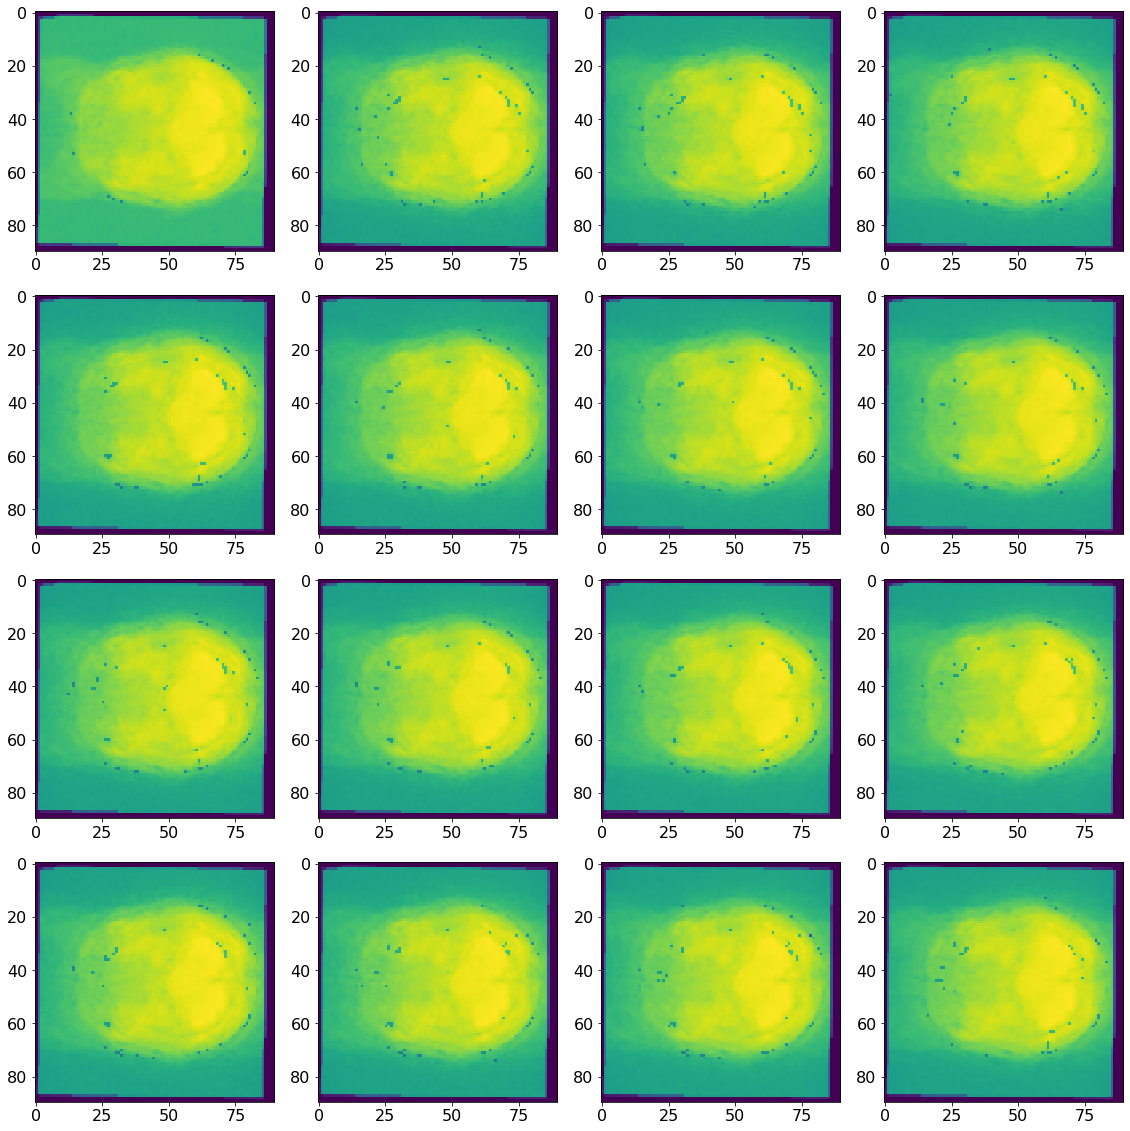

In [138]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
i = np.random.randint(data.shape[0])
logdata = np.log(data + 1e-7)
#z = 4

for t, ax in enumerate(axs.flatten()):
    # Taking 16-frame timesteps to try and see long term variations
    # Excluding first and last z slice because of problems in the data
    ax.imshow(logdata[i, :, :, 1:9, t*16].sum(axis=2), vmin=np.log(1e-7))

    # Z slice instead of projection
    #ax.imshow(logdata[i, :, :, z, t*16], vmin=np.log(1e-7))
    
plt.tight_layout()

There is still not much visible time variation here, and it looks a little noisy to me (disregarding the funky edge effects for now) 

## Time animation

Doesn't work currently. Need ffmpeg installed.

## Discussion

The data is mostly non-sparse, but the voxel intensity spans several orders of magnitude. It might be interesting to use a log transform.

Also, it appears like we could get away with some constant cropping to reduce image size. From visual inspection there seem to be ~15 empty pixels on both ends of the $y$ dimension. So one could potentially reduce from (90, 90, 60) down to (90, 60, 60) easily.

The time variations in this data are nearly imperceptible. It might be very hard to learn dynamics on this dataset.